## Airbnb Dataset

This dataset provides detailed information about various Airbnb listings from different regions. It includes essential features such as property details, host information, location, pricing, amenities, and guest reviews. This dataset can be utilized for a variety of data analysis and machine learning tasks, including price prediction, sentiment analysis, and geographic trends in short-term rentals.

In [4]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
Airbnb = pd.read_csv("C://Users//rupes//OneDrive//Documents//GitHub//Airbnb project//Excel_DF//airbnb.csv")

Airbnb.head()
        

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


# Cheking shape, datatype and missing values

In [7]:
Airbnb.shape

(12805, 23)

In [8]:
Airbnb.dtypes

Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
dtype: object

In [9]:
print(Airbnb.isna().sum())

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64


In [10]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [11]:
def fill_missing_values(spaceship):
    for column in Airbnb.columns:
        Airbnb[column].fillna(Airbnb[column].mode()[0], inplace=True)
    return Airbnb

In [12]:
Airbnb_df = fill_missing_values(Airbnb)

In [13]:
Airbnb_df.isna().sum()

Unnamed: 0      0
id              0
name            0
rating          0
reviews         0
host_name       0
host_id         0
address         0
features        0
amenities       0
safety_rules    0
hourse_rules    0
img_links       0
price           0
country         0
bathrooms       0
beds            0
guests          0
toiles          0
bedrooms        0
studios         0
checkin         0
checkout        0
dtype: int64

In [14]:
#Airbnb_df.to_excel('Airbnb_df1.xlsx', index=False, engine='openpyxl')

In [15]:
# Checking numerical columns for further analysis
Airbnb_df_num = Airbnb_df.select_dtypes(include=['number'])

print("Numerical columns in the DataFrame:")
Airbnb_df_num

Numerical columns in the DataFrame:


,Unnamed: 0,id,host_id,price,bathrooms,beds,guests,toiles,bedrooms,studios
0,0,49849504,357334205.0,8078,1,1,2,0,2,0
1,1,50891766,386223873.0,4665,2,2,4,0,2,0
2,2,50699164,409690853.0,5991,1,3,4,0,1,0
3,3,49871422,401873242.0,11339,1,2,4,0,1,0
4,4,51245886,414884116.0,6673,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
12800,12800,44697740,161552316.0,4288,8,0,4,0,0,0
12801,12801,29975283,118954227.0,15200,0,1,2,1,1,0
12802,12802,32977697,175214568.0,9103,1,2,2,0,1,0
12803,12803,8006146,718423.0,42262,2,4,8,0,2,0


# Quick EDA

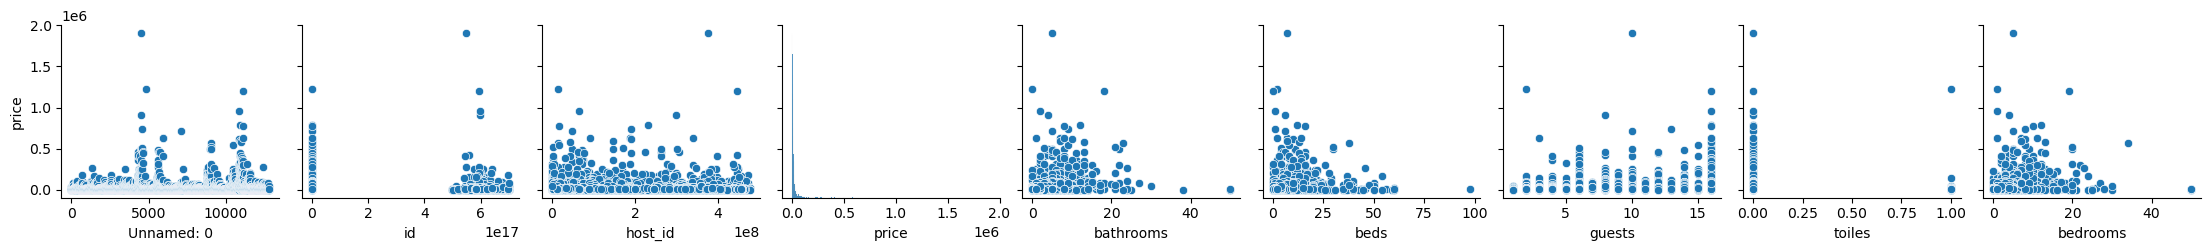

In [16]:
sns.pairplot(Airbnb_df_num, y_vars=['price'], x_vars=Airbnb_df_num.columns[:-1], kind='scatter')

#rating column conver in to numerical

In [17]:
Airbnb_df['rating'] = Airbnb_df['rating'].astype(str)

# Extract the first letter of the cabin
Airbnb_df['rating'] = Airbnb_df['rating'].str[0]

# Replace 'n' from None with 'NaN' if you prefer to keep missing values as NaN
Airbnb_df['rating'] = Airbnb_df['rating'].replace('n', pd.NA)

print("\nTransformed DataFrame:")
print(Airbnb_df)
Airbnb_df.isna().sum()


Transformed DataFrame:
       Unnamed: 0        id  \
0               0  49849504   
1               1  50891766   
2               2  50699164   
3               3  49871422   
4               4  51245886   
...           ...       ...   
12800       12800  44697740   
12801       12801  29975283   
12802       12802  32977697   
12803       12803   8006146   
12804       12804  40547903   

                                                    name rating reviews  \
0                                         Perla bungalov      4      64   
1      Authentic Beach Architect Sheltered Villa with...      N       0   
2                                      cottages sataplia      4      68   
3                            Sapanca Breathable Bungalow      5      13   
4                                          Bungalov Ev 2      N       0   
...                                                  ...    ...     ...   
12800            Brown Dome House No. 3, full of healing      4      16   
128

Unnamed: 0      0
id              0
name            0
rating          0
reviews         0
host_name       0
host_id         0
address         0
features        0
amenities       0
safety_rules    0
hourse_rules    0
img_links       0
price           0
country         0
bathrooms       0
beds            0
guests          0
toiles          0
bedrooms        0
studios         0
checkin         0
checkout        0
dtype: int64

In [18]:
Airbnb_df_obj = Airbnb_df.select_dtypes(include=['object'])
Airbnb_df_obj

,name,rating,reviews,host_name,address,features,amenities,safety_rules,hourse_rules,img_links,country,checkin,checkout
0,Perla bungalov,4,64,Mehmetcan,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,Turkey,Flexible,12 00 pm
1,Authentic Beach Architect Sheltered Villa with...,N,0,Fatih,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,Turkey,4 00 pm - 11 00 pm,10 00 am
2,cottages sataplia,4,68,Giorgi,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,Georgia,After 1 00 pm,12 00 pm
3,Sapanca Breathable Bungalow,5,13,Melih,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,Turkey,After 2 00 pm,12 00 pm
4,Bungalov Ev 2,N,0,Arp Sapanca,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,Turkey,After 2 00 pm,12 00 pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,"Brown Dome House No. 3, full of healing",4,16,Aidan,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠁,C...","Check-in: 3:00 pm - 11:00 pm,Check out: 11:00 ...",https://a0.muscache.com/im/pictures/miso/Hosti...,South Korea,3 00 pm - 11 00 pm,11 00 am
12801,Bubble Hotel Ubud with Bathtub under the Sky,4,6,Martha,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 10:00 pm,Check out: 12:00 ...",https://a0.muscache.com/im/pictures/5ba944b2-b...,Indonesia,3 00 pm - 10 00 pm,12 00 pm
12802,Paradise Eco Hub,4,3,Silas,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",Check-in: After 3:00 pm,https://a0.muscache.com/im/pictures/1f442c84-4...,Uganda,After 3 00 pm,11 00 am
12803,WisDOME - Mentigi Bay Village - Gilis - Lombok,4,7,Cempaka,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Check out: 12:00 pm,No pets...",https://a0.muscache.com/im/pictures/105116799/...,Indonesia,Flexible,12 00 pm


In [19]:
#Airbnb['rating'].value_counts()

In [20]:
#dropping the unnecessary column from df
Airbnb_cleaned_obj= Airbnb_df_obj.drop(columns = ["name","host_name","address","safety_rules","img_links","hourse_rules","amenities","reviews","features","checkin","checkout"	])
Airbnb_cleaned_obj

,rating,country
0,4,Turkey
1,N,Turkey
2,4,Georgia
3,5,Turkey
4,N,Turkey
...,...,...
12800,4,South Korea
12801,4,Indonesia
12802,4,Uganda
12803,4,Indonesia


#converting countries in to the to its continent

In [21]:


# Sample list of countries
countries = ['Turkey', 'Georgia', 'Vietnam', 'Thailand', 'South Korea', 'India', 'Philippines', 'Japan', 'Lebanon', 'Taiwan',
             'Israel', 'Turkey', 'Armenia', 'Cyprus', 'Lithuania', 'Slovakia', 'Denmark', 'Germany', 'Indonesia', 'Poland',
             'Romania', 'Greece', 'Ukraine', 'Hungary', 'Albania', 'Bulgaria', 'Malaysia', 'Montenegro', 'Slovenia', 'Czechia',
             'Sweden', 'Austria', 'Croatia', 'Tanzania', 'Italy', 'Sri Lanka', 'Philippines', 'Bosnia & Herzegovina', 'Montenegro',
             'Kenya', 'Serbia', 'Seychelles', 'Finland', 'Norway', 'Iceland', 'Greenland', 'United States', 'Canada',
             'Svalbard & Jan Mayen', 'Iceland', 'France', 'Australia', 'Morocco', 'Egypt', 'South Africa', 'Spain',
             'United Arab Emirates', 'United Kingdom', 'Pakistan', 'Thailand', 'Nepal', 'Sri Lanka', 'Singapore', 'Cambodia',
             'Azerbaijan', 'Estonia', 'Latvia', 'Costa Rica', 'Netherlands', 'Portugal', 'New Zealand', 'Panama', 'Mexico',
             'Peru', 'Chile', 'Belize', 'Panama', 'Colombia', 'Switzerland', 'Ireland', 'Bolivia', 'India', 'United Kingdom',
             'Belgium', 'Brazil', 'Mauritius', 'Fiji', 'Maldives', 'Serbia', 'Hong Kong', 'Myanmar', 'Malaysia', 'Brunei', 'Italy',
             'Kyrgyzstan', 'Puerto Rico', 'Uruguay', 'Argentina', 'Bahamas', 'Oman', 'Kuwait', 'Saudi Arabia', 'Kazakhstan',
             'Uganda', 'Maldives', 'Qatar', 'Jordan', 'Egypt', 'Bangladesh', 'Mongolia', 'Uzbekistan', 'Israel', 'Liechtenstein', 'Rwanda',
             'Honduras', 'Nicaragua', 'Vanuatu', 'Belize', 'Cayman Islands', 'French Polynesia', 'Jamaica', 'Isle of Man', 'Guadeloupe',
             'Madagascar', 'Jordan', 'Bulgaria', 'Georgia', 'Japan', 'Greece', 'Portugal', 'Taiwan', 'Saudi Arabia', 'Norway', 'Åland Islands',
             'Latvia', 'Malta', 'Tunisia', 'Congo', 'Cuba', 'Cuba', 'Nigeria', 'Kosovo', 'St Martin', 'Guatemala', 'Senegal',
             'Puerto Rico', 'Morocco', 'Namibia']

# Create a dictionary mapping each country to its continent
country_to_continent = {
    'Turkey': 'Asia', 'Georgia': 'Asia', 'Vietnam': 'Asia', 'Thailand': 'Asia', 'South Korea': 'Asia',
    'India': 'Asia', 'Philippines': 'Asia', 'Japan': 'Asia', 'Lebanon': 'Asia', 'Taiwan': 'Asia',
    'Israel': 'Asia', 'Armenia': 'Asia', 'Cyprus': 'Asia', 'Indonesia': 'Asia', 'Malaysia': 'Asia',
    'Sri Lanka': 'Asia', 'Pakistan': 'Asia', 'Singapore': 'Asia', 'Cambodia': 'Asia', 'Azerbaijan': 'Asia',
    'Bangladesh': 'Asia', 'Myanmar': 'Asia', 'Brunei': 'Asia', 'Kyrgyzstan': 'Asia', 'Kazakhstan': 'Asia',
    'Qatar': 'Asia', 'Jordan': 'Asia', 'Mongolia': 'Asia', 'Uzbekistan': 'Asia', 'Saudi Arabia': 'Asia',
    'United Arab Emirates': 'Asia', 'Nepal': 'Asia', 'Hong Kong': 'Asia', 'Oman': 'Asia', 'Kuwait': 'Asia',
    'China': 'Asia', 'Sri Lanka': 'Asia', 'Maldives': 'Asia', 'Seychelles': 'Africa', 'Kenya': 'Africa',
    'Tanzania': 'Africa', 'Morocco': 'Africa', 'Egypt': 'Africa', 'South Africa': 'Africa', 'Nigeria': 'Africa',
    'Senegal': 'Africa', 'Uganda': 'Africa', 'Namibia': 'Africa', 'Madagascar': 'Africa', 'Finland': 'Europe',
    'Norway': 'Europe', 'Iceland': 'Europe', 'Greenland': 'Europe', 'Denmark': 'Europe', 'Germany': 'Europe',
    'Poland': 'Europe', 'Romania': 'Europe', 'Greece': 'Europe', 'Ukraine': 'Europe', 'Hungary': 'Europe',
    'Albania': 'Europe', 'Bulgaria': 'Europe', 'Montenegro': 'Europe', 'Slovenia': 'Europe', 'Czechia': 'Europe',
    'Sweden': 'Europe', 'Austria': 'Europe', 'Croatia': 'Europe', 'Italy': 'Europe', 'Bosnia & Herzegovina': 'Europe',
    'Serbia': 'Europe', 'Lithuania': 'Europe', 'Slovakia': 'Europe', 'Cyprus': 'Europe', 'Latvia': 'Europe',
    'Estonia': 'Europe', 'Netherlands': 'Europe', 'Portugal': 'Europe', 'Switzerland': 'Europe', 'Ireland': 'Europe',
    'United Kingdom': 'Europe', 'France': 'Europe', 'Belgium': 'Europe', 'Liechtenstein': 'Europe', 'Malta': 'Europe',
    'Finland': 'Europe', 'Åland Islands': 'Europe', 'Kosovo': 'Europe', 'Lithuania': 'Europe', 'Slovakia': 'Europe',
    'Denmark': 'Europe', 'Germany': 'Europe', 'Poland': 'Europe', 'Romania': 'Europe', 'Greece': 'Europe',
    'Ukraine': 'Europe', 'Hungary': 'Europe', 'Albania': 'Europe', 'Bulgaria': 'Europe', 'Montenegro': 'Europe',
    'Slovenia': 'Europe', 'Czechia': 'Europe', 'Sweden': 'Europe', 'Austria': 'Europe', 'Croatia': 'Europe',
    'Italy': 'Europe', 'Bosnia & Herzegovina': 'Europe', 'Serbia': 'Europe', 'Lithuania': 'Europe',
    'Slovakia': 'Europe', 'Cyprus': 'Europe', 'Latvia': 'Europe', 'Estonia': 'Europe', 'Netherlands': 'Europe',
    'Portugal': 'Europe', 'Switzerland': 'Europe', 'Ireland': 'Europe', 'United Kingdom': 'Europe', 'France': 'Europe',
    'Belgium': 'Europe', 'Liechtenstein': 'Europe', 'Malta': 'Europe', 'Finland': 'Europe', 'Åland Islands': 'Europe',
    'Kosovo': 'Europe', 'Greenland': 'Europe', 'United States': 'North America', 'Canada': 'North America',
    'Mexico': 'North America', 'Panama': 'North America', 'Costa Rica': 'North America', 'Belize': 'North America',
    'Honduras': 'North America', 'Nicaragua': 'North America', 'Cayman Islands': 'North America',
    'Bahamas': 'North America', 'Cuba': 'North America', 'Puerto Rico': 'North America', 'Guatemala': 'North America',
    'Colombia': 'South America', 'Peru': 'South America', 'Chile': 'South America', 'Argentina': 'South America',
    'Brazil': 'South America', 'Uruguay': 'South America', 'Bolivia': 'South America', 'Vanuatu': 'Oceania',
    'French Polynesia': 'Oceania', 'Australia': 'Oceania', 'New Zealand': 'Oceania', 'Fiji': 'Oceania'
}

# Create DataFrame from the list of countries
country_to_continent_df = pd.DataFrame({'country': countries})

# Map the countries to continents
country_to_continent_df['continent'] = country_to_continent_df['country'].map(country_to_continent)

# Drop any rows where the continent is NaN (i.e., countries not in the dictionary)
country_to_continent_df.dropna(subset=['continent'], inplace=True)

# Group by continent
grouped_by_continent = country_to_continent_df.groupby('continent')['country'].count()

print(grouped_by_continent)


continent
Africa           13
Asia             48
Europe           48
North America    17
Oceania           5
South America     7
Name: country, dtype: int64


In [22]:
country_to_continent_df = country_to_continent_df.rename(columns={'country': 'newcountry'})
country_to_continent_df.reset_index(drop=True, inplace=True)
country_to_continent_df

,newcountry,continent
0,Turkey,Asia
1,Georgia,Asia
2,Vietnam,Asia
3,Thailand,Asia
4,South Korea,Asia
...,...,...
133,Guatemala,North America
134,Senegal,Africa
135,Puerto Rico,North America
136,Morocco,Africa


In [23]:
country_to_continent_df.isna().sum()

newcountry    0
continent     0
dtype: int64

In [24]:
Airbnb_cleaned_obj.isna().sum()

rating     0
country    0
dtype: int64

In [25]:
# Reset index if needed
Airbnb_cleaned_obj.reset_index(drop=True, inplace=True)
country_to_continent_df.reset_index(drop=True, inplace=True)

# Concatenate along columns
concat_Airbnb_cleaned_obj_continent = pd.concat([Airbnb_cleaned_obj, country_to_continent_df], axis=1)


In [26]:
concat_Airbnb_cleaned_obj_continent

,rating,country,newcountry,continent
0,4,Turkey,Turkey,Asia
1,N,Turkey,Georgia,Asia
2,4,Georgia,Vietnam,Asia
3,5,Turkey,Thailand,Asia
4,N,Turkey,South Korea,Asia
...,...,...,...,...
12800,4,South Korea,NaN,NaN
12801,4,Indonesia,NaN,NaN
12802,4,Uganda,NaN,NaN
12803,4,Indonesia,NaN,NaN


In [27]:
Airbnb_cleaned_obj.isna().sum()

rating     0
country    0
dtype: int64

In [28]:
#keep same df( name because want to avoid the code changes in further below 
Airbnb_cleaned_obj1=concat_Airbnb_cleaned_obj_continent

In [29]:
concat_Airbnb_cleaned_obj_continent.isna().sum()

rating            0
country           0
newcountry    12667
continent     12667
dtype: int64

#For non-numerical columns, do dummies.

In [33]:
df_encoded = pd.get_dummies(Airbnb_cleaned_obj, drop_first = True).astype(int)
df_encoded

,rating_4,rating_5,rating_N,country_ Argentina,country_ Armenia,country_ Australia,country_ Austria,country_ Azerbaijan,country_ Bahamas,country_ Bangladesh,...,country_Philippines,country_Portugal,country_Puerto Rico,country_Saudi Arabia,country_Serbia,country_Sri Lanka,country_Taiwan,country_Thailand,country_Turkey,country_United Kingdom
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12801,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12802,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12803,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Trying label encoding because I can see hierarchy.

In [31]:
# Encoding the categorical column rating 
#from sklearn.preprocessing import LabelEncoder
#label_encoder_country = LabelEncoder()
#Airbnb_cleaned_obj['Country_encoded'] = label_encoder_country.fit_transform(Airbnb_cleaned_obj['continent'])

In [34]:
concat_Airbnb= pd.concat([Airbnb_df_num, df_encoded], axis = 1).drop(columns= ['Unnamed: 0','id','host_id'])
#concat_Airbnb= pd.concat([Airbnb_df_num, Airbnb_cleaned_obj], axis = 1).drop(columns= ['Unnamed: 0','id','host_id',"country"])

#concat_Airbnb

In [ ]:
#concat_Airbnb.to_excel('concat_Airbnb.xlsx', index=False, engine='openpyxl')

## Train Test Split

In [35]:
features = concat_Airbnb.drop(columns = ["price"])
target = concat_Airbnb["price"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

## Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

Transforming our training and testing data

In [38]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [39]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [40]:
X_train_norm

,bathrooms,beds,guests,toiles,bedrooms,studios,rating_4,rating_5,rating_N,country_ Argentina,...,country_Philippines,country_Portugal,country_Puerto Rico,country_Saudi Arabia,country_Serbia,country_Sri Lanka,country_Taiwan,country_Thailand,country_Turkey,country_United Kingdom
0,0.08,0.030612,0.933333,0.0,0.06,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.14,0.163265,1.000000,0.0,0.14,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.010204,0.000000,0.0,0.02,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.02,0.010204,0.066667,0.0,0.02,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.04,0.020408,0.200000,0.0,0.04,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,0.02,0.020408,0.266667,0.0,0.02,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10240,0.02,0.010204,0.133333,0.0,0.02,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10241,0.00,0.010204,0.066667,0.0,0.02,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10242,0.06,0.142857,1.000000,0.0,0.10,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



#ForAirbnb project we will be using KNN as our predictive model.

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)

In [42]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [43]:
knn.score(X_test, y_test)

-4.86946563774512

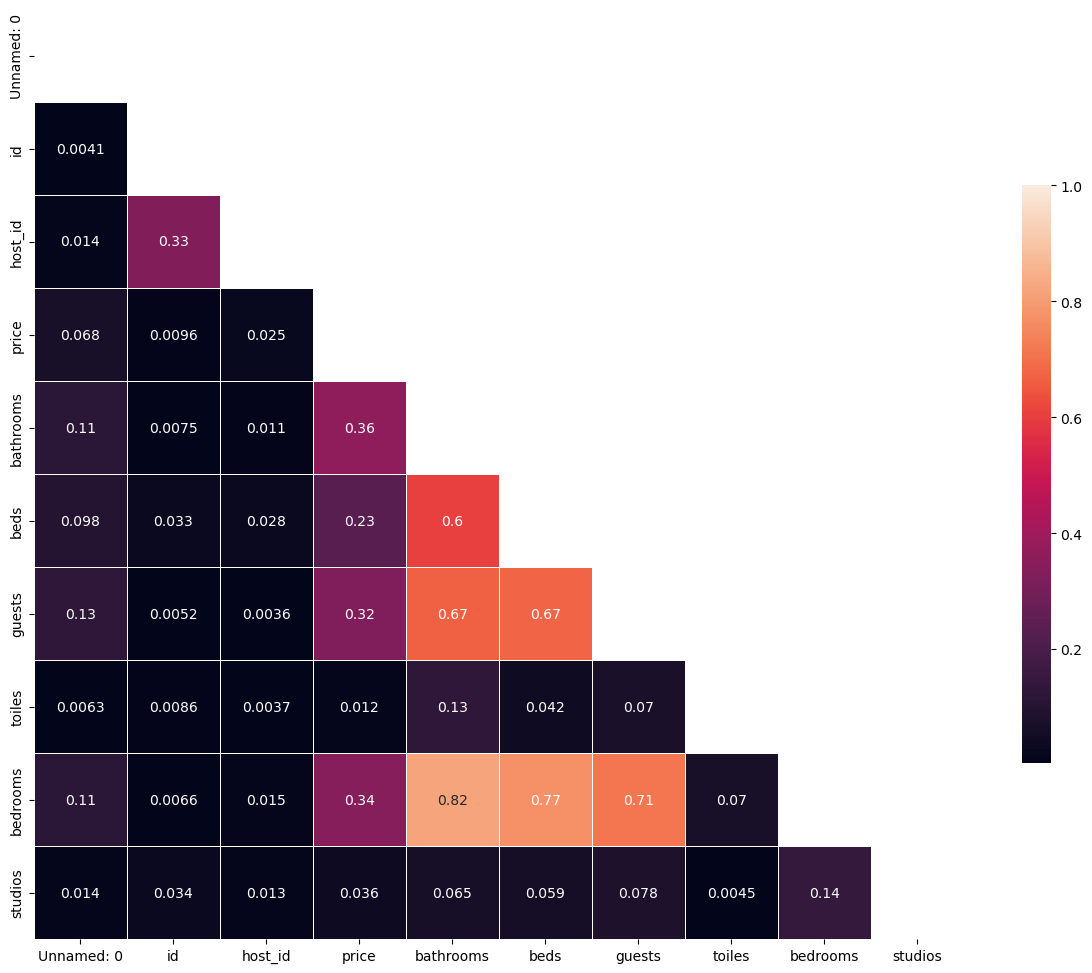

In [44]:
corr=np.abs(Airbnb_df_num.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [45]:
X_train_reduced = X_train_norm.drop(columns = [ "toiles"])
X_test_reduced = X_test_norm.drop(columns = ["toiles"])

In [110]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=21)

In [111]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=21)

In [112]:
knn.score(X_test, y_test)

0.2512857383690017

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt.score(X_test, y_test)

-1.9977713602709666

## Bagging and Pasting

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [75]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [76]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [77]:
pred = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 11281.48426253074
RMSE 30926.03526970917
R2 score 0.33350963954542545


## Random Patches

In [83]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=5)

In [84]:
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=100, n_estimators=1000)

In [145]:
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 12352.62697066511
RMSE 43520.53539352258
R2 score -0.319878145086836


# AdaBoost

In [142]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                            n_estimators=300)

In [143]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                  n_estimators=300)

In [144]:
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 13653.576009684626
RMSE 51957.99307121264
R2 score -0.8812655997470058


# Gradient Boosting

In [116]:
gb_reg = GradientBoostingRegressor(max_depth=5,
                                   n_estimators=10)

In [117]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=10)

In [119]:
pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 12883.462375343795
RMSE 32898.334584112075
R2 score 0.2457884043621068


In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [154]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 500, stop = 3000, num = 10)],
        "estimator__max_depth":[int(x) for x in np.linspace(10, 110, num = 11)]}

In [155]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [156]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110],
                                        'estimator__max_leaf_nodes': [500, 777,
                                                                      1055,
                                                                      1333,
                                                                      1611,
                                                                      1888,
                                                                      2166,
                                                                      2444,
                                                                      2722,
                                                                      3000],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [157]:
RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110],
                                        'estimator__max_leaf_nodes': [500, 777,
                                                                      1055,
                                                                      1333,
                                                                      1611,
                                                                      1888,
                                                                      2166,
                                                                      2444,
                                                                      2722,
                                                                      3000],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110],
                                        'estimator__max_leaf_nodes': [500, 777,
                                                                      1055,
                                                                      1333,
                                                                      1611,
                                                                      1888,
                                                                      2166,
                                                                      2444,
                                                                      2722,
                                                                      3000],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [158]:
model.best_params_

{'n_estimators': 1000,
 'estimator__max_leaf_nodes': 2444,
 'estimator__max_depth': 80}

In [159]:
best_model = model.best_estimator_

In [160]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 12763.06679658301
RMSE 54132.97903803348
R2 score -1.0420634606058745
